In [56]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yaml

from analysis.dataset.june_dataset import JuNEDataset
from analysis.metrics.metrics_transtions import TransitionMetrics


def read_config(config_path: Path = Path("data_config.yaml")) -> dict:
    with config_path.open("r") as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError:
            return {}


config = read_config()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
df_hack = pd.read_csv(config.get("dataset_path"), index_col=0)
df_labels = pd.read_csv(config.get("label_mapping_path"), index_col=0)
df_hack = df_hack.merge(df_labels, on='action_id')

df_hack.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,NaN,NaN,NaN,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",NaN,student_7,False,NaN
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False,helper_functions
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,NaN,student_7,False,helper_functions
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions


In [59]:
june = JuNEDataset(df_hack)
june.prepare_dataset()
june.df.head()


,action_id,time,session_id,kernel_id,notebook_name,event,cell_index,cell_num,cell_type,cell_source,cell_output,user_id,expert,cell_label,task
0,0,2023-05-06 10:32:26.282,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,save_notebook,None,None,None,"[\n {\n ""id"": ""35c0b3b694f84140846a21197ea...",None,student_7,False,None,task1
1,1,2023-05-06 10:32:55.892,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,helper_functions,task1
2,2,2023-05-06 10:32:56.229,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions,task1
3,3,2023-05-06 10:32:58.048,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,None,student_7,False,helper_functions,task1
4,4,2023-05-06 10:32:58.429,709ce80b-90a5-457e-bf6f-b7033a3261b5,bc147b33-fa74-4bff-9f48-c88809c5bdcd,task1.ipynb,finished_execute,35c0b3b694f84140846a21197ea62f68,0.0,code,from mining_extension import check_logging \nc...,"[{""output_type"":""stream"",""size"":23}]",student_7,False,helper_functions,task1


In [60]:
processor = TransitionMetrics()
all_transitions = processor.calculate_metrics(june.df)
all_transitions.head()


100%|██████████| 31/31 [00:00<00:00, 3686.52it/s]


,kernel_id,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,cell_label_from,cell_label_to,inner_transition,type,event_from,event_to
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,e139884774504ae997d7e38e6be6da88,0.0,# # Do not forget to check if your notebook lo...,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,helper_functions,helper_functions,False,execution_transition,NaN,NaN
1,0033f76c-6179-4fb4-a9ce-79112a52b51c,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,helper_functions,load_data,False,execution_transition,NaN,NaN
2,0033f76c-6179-4fb4-a9ce-79112a52b51c,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,load_data,None,False,execution_transition,NaN,NaN
3,0033f76c-6179-4fb4-a9ce-79112a52b51c,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,None,None,False,execution_transition,NaN,NaN
4,0033f76c-6179-4fb4-a9ce-79112a52b51c,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,8fd58da2205544c1a978c43701cd5678,0.0,# # Do not forget to check if your notebook lo...,None,data_preprocessing,False,execution_transition,NaN,NaN


In [61]:
execution_transitions = all_transitions[all_transitions.type == "execution_transition"]
execution_transitions.shape


(9176, 13)

In [62]:
execution_transitions.inner_transition.value_counts(normalize=True)


inner_transition
False    0.610615
True     0.389385
Name: proportion, dtype: float64

In [73]:
all_transitions_merged = execution_transitions.merge(
    june.df[['task', 'kernel_id', 'expert']].drop_duplicates(subset=['task', 'kernel_id'], keep='last'),
    on='kernel_id'
)
all_transitions_merged.head()


,kernel_id,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,cell_label_from,cell_label_to,inner_transition,type,event_from,event_to,task,expert
0,0033f76c-6179-4fb4-a9ce-79112a52b51c,e139884774504ae997d7e38e6be6da88,0.0,# # Do not forget to check if your notebook lo...,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,helper_functions,helper_functions,False,execution_transition,NaN,NaN,task1,False
1,0033f76c-6179-4fb4-a9ce-79112a52b51c,a47800e62cbe40c1ad4003b2879f5f03,1.0,!pip install pandas\n,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,helper_functions,load_data,False,execution_transition,NaN,NaN,task1,False
2,0033f76c-6179-4fb4-a9ce-79112a52b51c,832d6ff5591b46a0ab57d4f57fb6bff4,2.0,!pip install sklearn,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,load_data,None,False,execution_transition,NaN,NaN,task1,False
3,0033f76c-6179-4fb4-a9ce-79112a52b51c,da13661b37a24a319d339a52b96bd0c7,3.0,!pip install catboost\n!pip install xgboost,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,None,None,False,execution_transition,NaN,NaN,task1,False
4,0033f76c-6179-4fb4-a9ce-79112a52b51c,fcbfe01318394ee78c110d6efe344931,4.0,import pandas as pd\nimport sklearn\nimport ca...,8fd58da2205544c1a978c43701cd5678,0.0,# # Do not forget to check if your notebook lo...,None,data_preprocessing,False,execution_transition,NaN,NaN,task1,False


In [102]:
all_transitions_merged.groupby(["expert", "task"]).inner_transition.value_counts(normalize=True)


expert  task   inner_transition
False   task1  False               0.563229
               True                0.436771
        task2  False               0.611029
               True                0.388971
True    task1  False               0.509106
               True                0.490894
        task2  False               0.774381
               True                0.225619
Name: proportion, dtype: float64

In [103]:
grouped_transitions = all_transitions_merged.groupby(['cell_label_from']) \
    .cell_label_to.value_counts().reset_index().rename({"count": "transitions_count"}, axis=1)

grouped_transitions['probability'] = grouped_transitions.transitions_count / grouped_transitions.transitions_count.sum()

grouped_transitions.head()


,cell_label_from,cell_label_to,transitions_count,probability
0,comment_only,comment_only,594,0.093411
1,comment_only,data_exploration,314,0.049379
2,comment_only,data_preprocessing,255,0.040101
3,comment_only,helper_functions,155,0.024375
4,comment_only,modelling,43,0.006762


In [108]:
transitions_matrix = grouped_transitions.pivot(
    index='cell_label_from', columns='cell_label_to', values='probability'
).fillna(0)
transitions_matrix.sum().sum().round(5)


1.0

In [109]:
labels = [
    'comment_only', 'helper_functions', 'load_data', 'data_exploration',
    'data_preprocessing', 'result_visualization', 'save_results', 'modelling', 'evaluation',
    'prediction'
]

def plot_transitions_matrix(matrix, fig_ax=None):
    if fig_ax is None:
        fig, ax = plt.subplots(figsize=(12, 9))
    else:
        fig, ax = fig_ax

    full_matrix = pd.DataFrame(columns=labels, index=labels)
    full_matrix.loc[labels, labels] = matrix
    full_matrix = full_matrix.fillna(-1)
    mask = np.where(full_matrix == -1, True, False)
    
    cmap = sns.color_palette("Blues", as_cmap=True)
    cmap.set_bad(color='grey', alpha=0.1)

    ax = sns.heatmap(
        full_matrix.fillna(-1).round(3),
        annot=True,
        fmt="", cmap=cmap, mask=mask,
        linewidths=1,
        square=True, robust=True, ax=ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    )
    return fig, ax


In [110]:
task, expert = 'task2', True
grouped_transitions = all_transitions_merged \
    .groupby(['task', 'expert']).get_group((task, expert)) \
    .groupby(['cell_label_from']).cell_label_to.value_counts() \
    .reset_index().rename({"count": "transitions_count"}, axis=1)

grouped_transitions['probability'] = grouped_transitions.transitions_count / grouped_transitions.transitions_count.sum()

transitions_matrix = grouped_transitions.pivot(
    index='cell_label_from', columns='cell_label_to', values='probability'
).fillna(0)
transitions_matrix


cell_label_to,comment_only,data_exploration,data_preprocessing,helper_functions,load_data,modelling,prediction,result_visualization,save_results
cell_label_from,,,,,,,,,
comment_only,0.124461,0.047443,0.045595,0.019100,0.004929,0.002465,0.003697,0.001848,0.000616
data_exploration,0.051756,0.171288,0.035736,0.009242,0.002465,0.002465,0.001232,0.011707,0.000616
data_preprocessing,0.043130,0.033888,0.191620,0.009858,0.000000,0.000000,0.000616,0.000000,0.000000
helper_functions,0.011707,0.011707,0.004313,0.049291,0.007394,0.003081,0.001848,0.001232,0.000000
load_data,0.003081,0.008626,0.000616,0.000000,0.004929,0.000000,0.000000,0.000000,0.000000
modelling,0.004313,0.001232,0.001232,0.002465,0.000000,0.025262,0.003697,0.000000,0.000000
prediction,0.006778,0.001232,0.000000,0.000000,0.000000,0.001848,0.011091,0.000000,0.000000
result_visualization,0.001848,0.011707,0.000616,0.000616,0.000000,0.000000,0.000000,0.001232,0.000000
save_results,0.000000,0.000000,0.000000,0.000616,0.000000,0.000000,0.000000,0.000000,0.000616


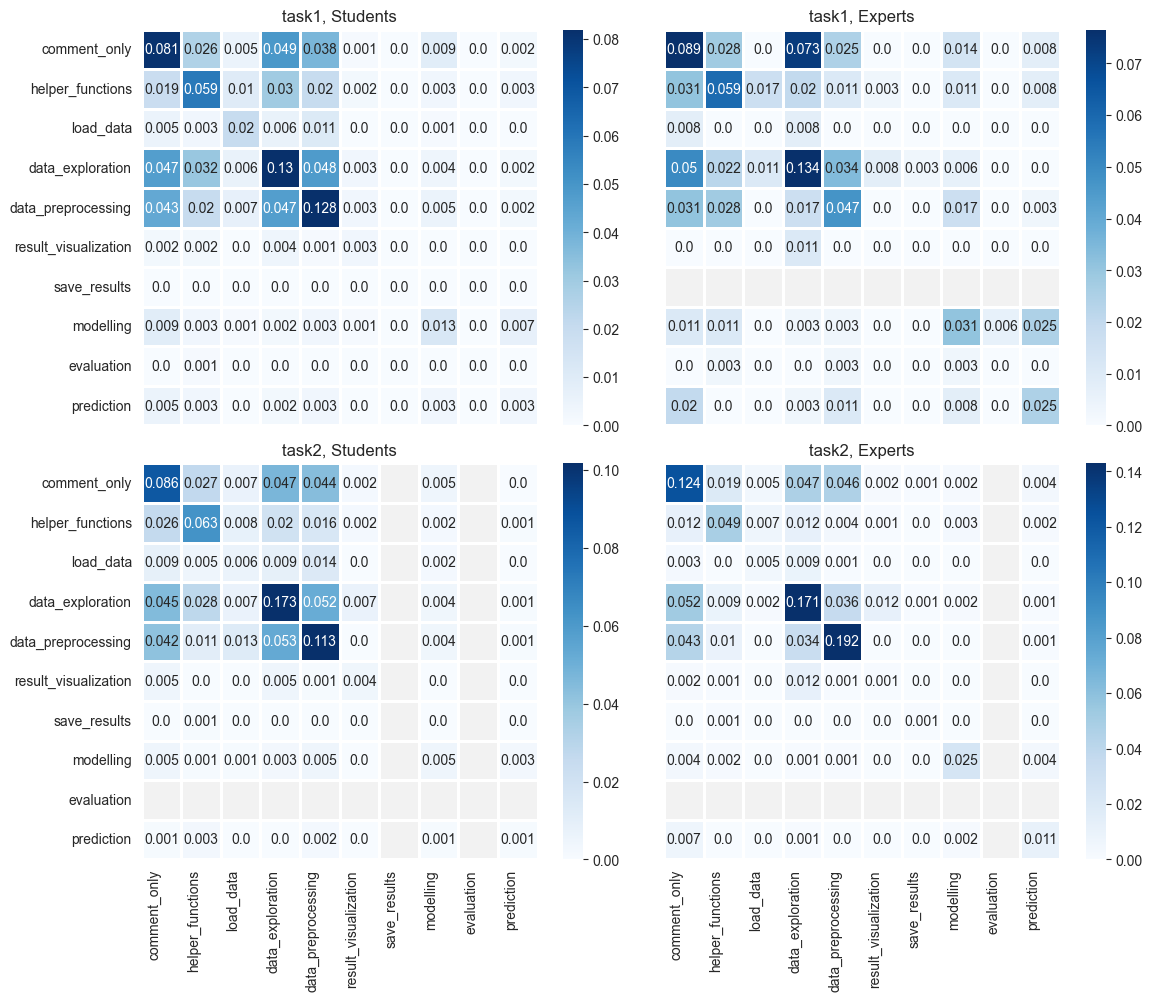

In [111]:
sns.set_style("whitegrid", {'axes.grid': False})

fig_all, ax_all = plt.subplots(2, 2, figsize=(12, 10))

for i, task in enumerate(['task1', 'task2']):
    for j, expert in enumerate([False, True]):
        grouped_transitions = all_transitions_merged \
            .groupby(['task', 'expert']).get_group((task, expert)) \
            .groupby(['cell_label_from']).cell_label_to.value_counts() \
            .reset_index().rename({"count": "transitions_count"}, axis=1)

        grouped_transitions[
            'probability'] = grouped_transitions.transitions_count / grouped_transitions.transitions_count.sum()

        transitions_matrix = grouped_transitions.pivot(
            index='cell_label_from', columns='cell_label_to', values='probability'
        ).fillna(0)
        ax_all[i][j].set_title(f"{task}, {'Experts' if expert else 'Students'}")
        fig_all, ax_all[i][j] = plot_transitions_matrix(transitions_matrix, (fig_all, ax_all[i][j]))

ax_all[0, 0].set_xticks([])
ax_all[0, 1].set_xticks([])
ax_all[0, 1].set_yticks([])
ax_all[1, 1].set_yticks([])
plt.tight_layout()

plt.savefig(f'figures/transitions/transitions_matrix_new.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [112]:
transitions_matrix.sum().sum()


1.0

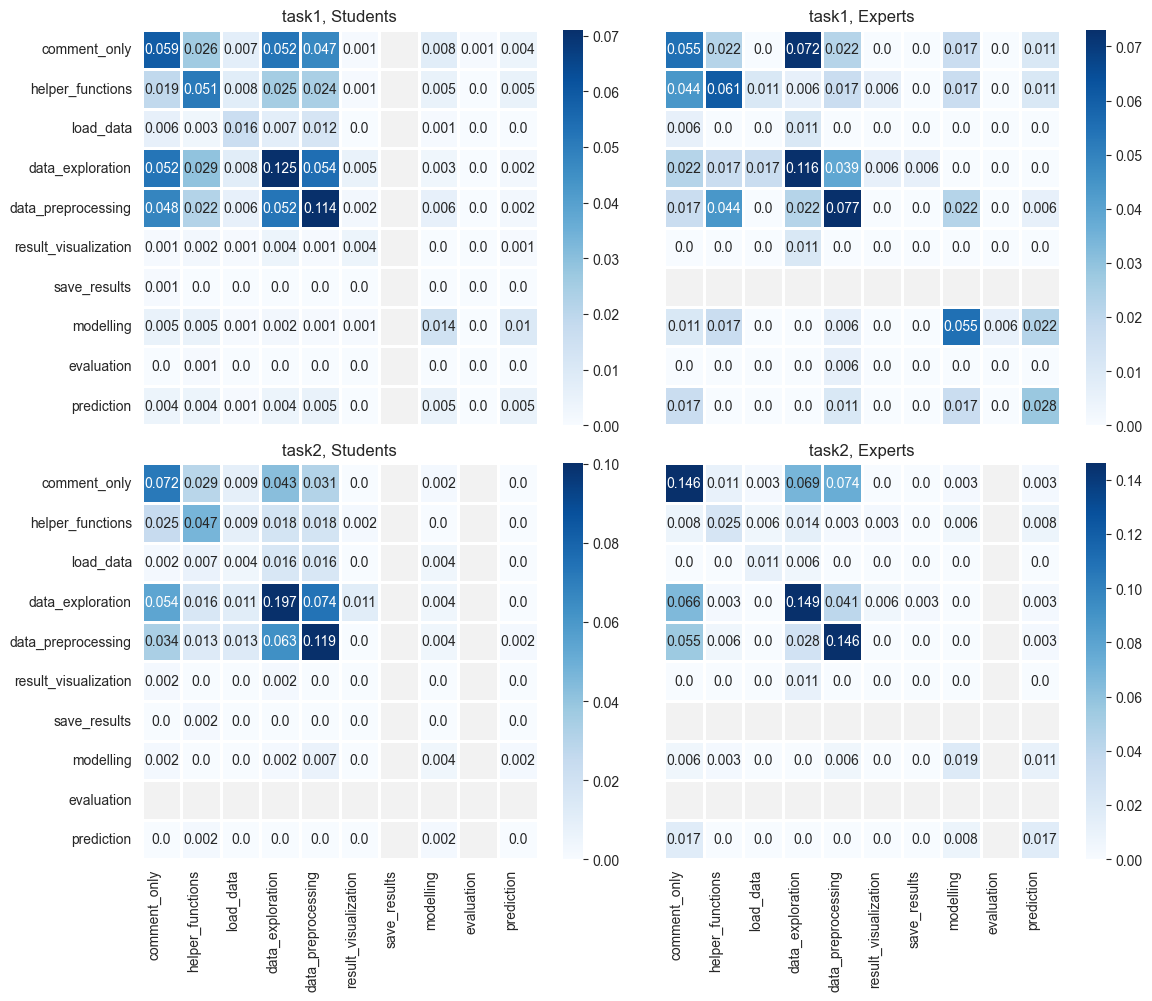

In [113]:
fig_all, ax_all = plt.subplots(2, 2, figsize=(12, 10))

for i, task in enumerate(['task1', 'task2']):
    for j, expert in enumerate([False, True]):
        grouped_transitions = all_transitions_merged.groupby("inner_transition").get_group(True) \
            .groupby(['task', 'expert']).get_group((task, expert)) \
            .groupby(['cell_label_from']).cell_label_to.value_counts() \
            .reset_index().rename({"count": "transitions_count"}, axis=1)

        grouped_transitions['probability'] = (
                grouped_transitions.transitions_count / grouped_transitions.transitions_count.sum()
        )

        transitions_matrix = grouped_transitions.pivot(
            index='cell_label_from', columns='cell_label_to', values='probability'
        ).fillna(0)
        ax_all[i][j].set_title(f"{task}, {'Experts' if expert else 'Students'}")
        fig_all, ax_all[i][j] = plot_transitions_matrix(transitions_matrix, (fig_all, ax_all[i][j]))

ax_all[0, 0].set_xticks([])
ax_all[0, 1].set_xticks([])
ax_all[0, 1].set_yticks([])
ax_all[1, 1].set_yticks([])

plt.tight_layout()

plt.savefig(f'figures/transitions/inner_transitions_matrix_new.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [117]:
d = all_transitions_merged.groupby(['task', 'expert']).get_group(('task1', False))
d[d['cell_label_from'] == 'save_results']


,kernel_id,cell_idx_from,cell_num_from,cell_source_from,cell_idx_to,cell_num_to,cell_source_to,cell_label_from,cell_label_to,inner_transition,type,event_from,event_to,task,expert
5255,82d8f1a7-ac5e-4f6d-95ed-9b1f8680a8af,c5a92f9ab731421b8f78ada6653d00db,0.0,# # Do not forget to check if your notebook lo...,c5a92f9ab731421b8f78ada6653d00db,0.0,# # Do not forget to check if your notebook lo...,save_results,comment_only,True,execution_transition,NaN,NaN,task1,False
5317,82d8f1a7-ac5e-4f6d-95ed-9b1f8680a8af,6c870fd3e877493b8d0f15f61422f00d,0.0,"l = content.strip().split("":"", 1)\n# print(l[1...",fee6c5bfad7442e0a0b58c3c3b89eef0,0.0,"df0 = pd.DataFrame([], columns = ['user_id', '...",save_results,save_results,False,execution_transition,NaN,NaN,task1,False
5318,82d8f1a7-ac5e-4f6d-95ed-9b1f8680a8af,fee6c5bfad7442e0a0b58c3c3b89eef0,0.0,"df0 = pd.DataFrame([], columns = ['user_id', '...",f1bacfd016f8403b86bdb447b1d4b66e,0.0,f = open('data/task1/jetnet_logs.txt')\nlines ...,save_results,data_exploration,False,execution_transition,NaN,NaN,task1,False
